In [1]:
#Se cargan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Se lee el archivo y se le asigna una variable 
df9 = pd.read_csv('meteo-nogal-09.csv', engine='python')
df9 = df9.drop(df9.index[0]).reset_index(drop=True)
df9 = pd.DataFrame(df9)

In [3]:
df9 = df9.drop(df9.columns[18:36], axis=1, inplace=False)   #Se eliminan columnas sin nombre
df9 = df9.drop(df9.columns[2:4], axis=1, inplace=False)     #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

df9['FECHA'] = df9['DATE'] + ' ' + df9['TIME']             #Se combinan columnas y se eliminan                            
df9 = df9.drop(df9.columns[0:2], axis=1, inplace=False)   

df9['FECHA'] = pd.to_datetime(df9.apply(lambda x: x['FECHA'], 1), dayfirst=True)        #Se hace la fecha variable date time y
df9 = df9.set_index('FECHA')                                                            #se pone como Index

df9 = df9.loc['2009-01-01 00:10:00':'2009-12-31 23:50:00']                      #Se seleccionan las fechas que se necesitan

cols = ['u_Avg', 'v_Avg', 'w_Avg', 't_Avg','kh20_Avg','net_rad_Avg','shf1_Avg','shf2_Avg', 'vv_Avg','airT_Avg','e_sat_Avg','e_Avg','h2o_hmp_Avg']
df9[cols] = df9[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [4]:
#cor = df9.corr().abs()
cor = df9.corr()
#corimportante=np.where(cor>0.6)
#corimportante=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [5]:
df9.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
dtype: object

In [6]:
cor

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064
airT_Avg,-0.363548,-0.344386,-0.338470,-0.231403,-0.122687,0.334375,-0.121637,0.078023,-0.223757,1.000000,-0.484177,0.964464,0.088203,0.464621


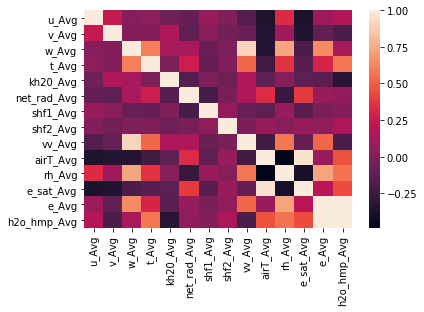

In [7]:
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=False)


In [8]:
cor = df9.corr().abs()
corimportante=np.where(cor>0.6)
corimportante=[(cor.columns[x],cor.columns[y]) for x,y in zip(*corimportante) if x!=y and x<y]

In [9]:
corimportante

[('w_Avg', 't_Avg'),
 ('w_Avg', 'vv_Avg'),
 ('w_Avg', 'rh_Avg'),
 ('w_Avg', 'e_Avg'),
 ('airT_Avg', 'e_sat_Avg'),
 ('rh_Avg', 'e_Avg'),
 ('e_Avg', 'h2o_hmp_Avg')]

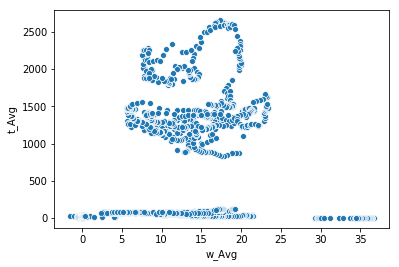

In [10]:
t1 = sns.scatterplot(x=df9['w_Avg'], y=df9['t_Avg'])

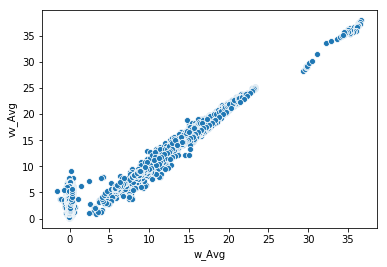

In [11]:
t2 = sns.scatterplot(x=df9['w_Avg'], y=df9['vv_Avg'])

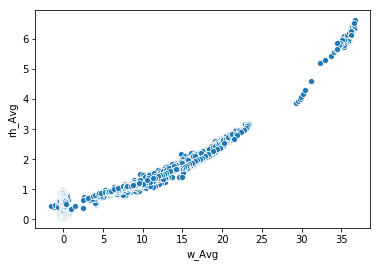

In [12]:
t3 = sns.scatterplot(x=df9['w_Avg'], y=df9['rh_Avg'])

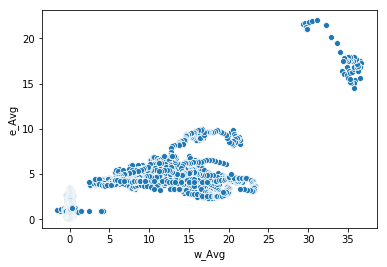

In [13]:
t4 = sns.scatterplot(x=df9['w_Avg'], y=df9['e_Avg'])

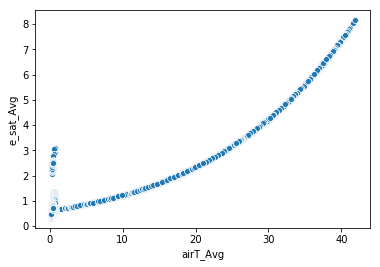

In [14]:
t5 = sns.scatterplot(x=df9['airT_Avg'], y=df9['e_sat_Avg'])

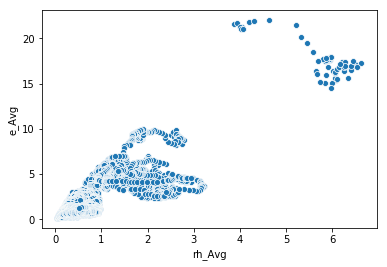

In [15]:
t6 = sns.scatterplot(x=df9['rh_Avg'], y=df9['e_Avg'])

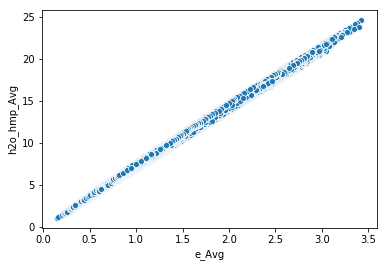

In [16]:
t7 = sns.scatterplot(x=df9['e_Avg'], y=df9['h2o_hmp_Avg'])